In [1]:
import django, sys, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()
from django.db.models import Q, F, Sum, Count, FloatField, Case, When, Value, Max
from scipy.sparse import coo_matrix, find
from sklearn.manifold import TSNE

from scoping.models import *
from tmv_app.models import *

run_id = 665
s = 100000
p = 50

In [2]:
m = np.load('../tsne_results/data/run_{}_s_{}_m.npy'.format(run_id,s))
r_ind = np.load('../tsne_results/data/run_{}_s_{}_r_ind.npy'.format(run_id,s))
tsne_results = np.load('../tsne_results/data/run_{}_s_{}_p{}.npy'.format(run_id,s,p))

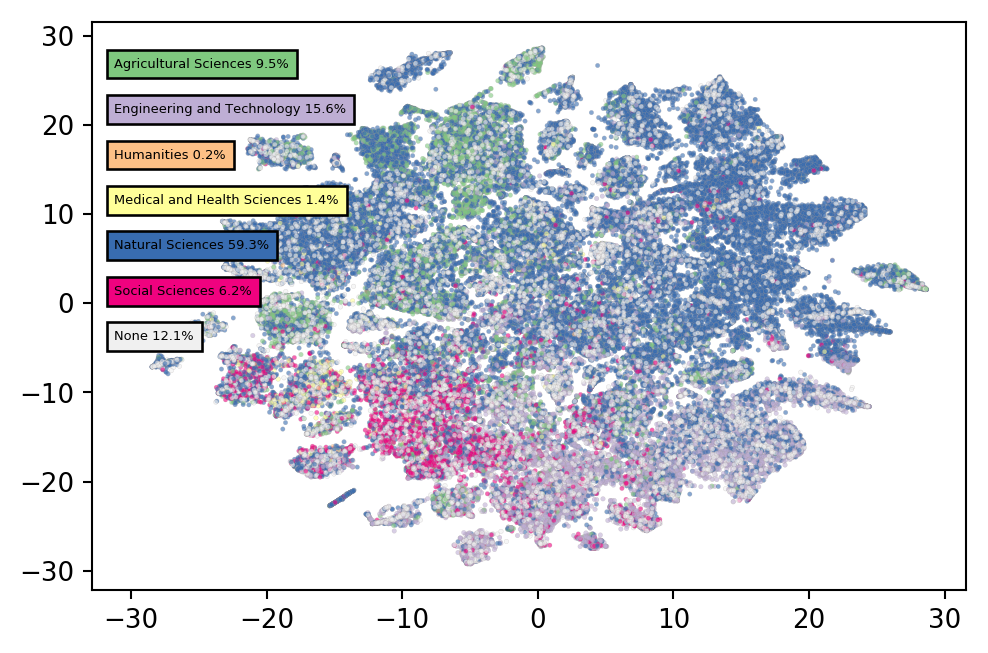

In [3]:
cs = []
sizes = []
xs = []
ys = []


fig = plt.figure(dpi=188)

colors = ['#b3e2cd','#fdcdac','#cbd5e8','#f4cae4','#e6f5c9','#fff2ae']
colors = ['#b3e2cd','#fdcdac','#cbd5e8','#f4cae4','#e6f5c9','#fff2ae','#f1e2cc']
colors = ['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0','#f0027f','#F0F0F0']
oecd_cats = list(Doc.objects.filter(id__in=r_ind).distinct('wc__oecd').values('wc__oecd'))
for i,c in enumerate(oecd_cats):
    c['docs'] = list(Doc.objects.filter(id__in=r_ind,wc__oecd=c['wc__oecd']).values_list('id',flat=True))
    c['color'] = colors[i]


#for i,t in enumerate(Doc.objects.filter(id__in=c_ind)):
for i,did in enumerate(r_ind):
    x = tsne_results[i,0]
    y = tsne_results[i,1]
    col = "#F0F0F0"
    for c in oecd_cats:
        if did in c['docs']:
            col = c['color']
    cs.append(col)
    xs.append(x)
    ys.append(y)
        

plt.scatter(
    xs,
    ys,
    s=3,
    alpha=0.6,
    #s=sizes,
    linewidth=0.1,
    c=cs,
    edgecolor='#a39c9c66'
)

l = plt.xlim()[0]
t = plt.ylim()[1]

yextent = plt.ylim()[1]- plt.ylim()[0]
ysp = yextent*0.08



for i,c in enumerate(oecd_cats):
    plt.text(
        l*0.95,
        t-ysp-i*ysp,
        "{} {:.1%}".format(c['wc__oecd'],len(c['docs'])/len(r_ind)),
        fontsize=5,
        bbox={
            'facecolor': c['color'],
            'pad': 3
        }
    )
plt.savefig('../tsne_results/plots/run_{}_s_{}_p{}_oecds.png'.format(run_id,s,p))
plt.show()

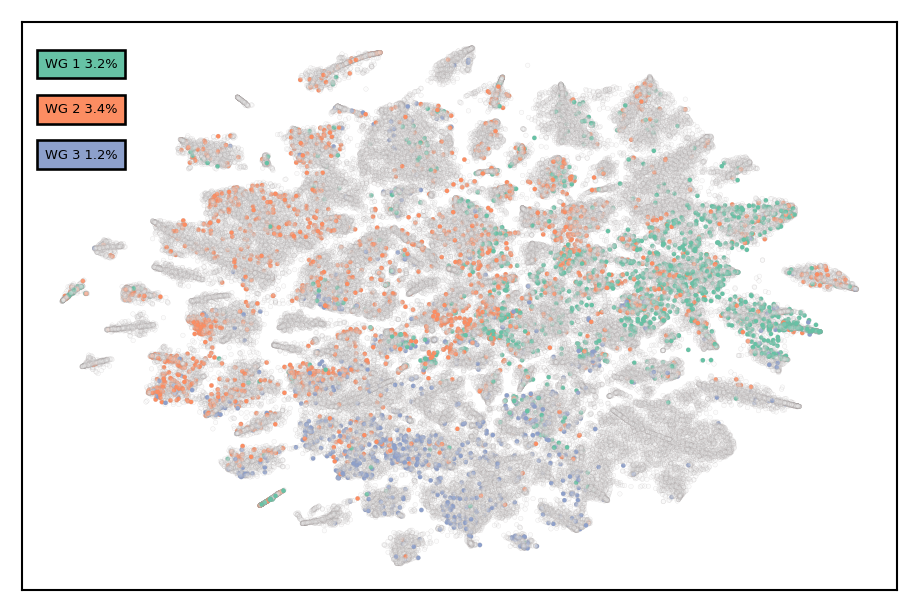

In [4]:
colors=["#66c2a5","#fc8d62","#8da0cb"]

cs = []
sizes = []
xs = []
ys = []
alphas=[]
fig = plt.figure(dpi=188)

wgs = list(scoping.models.WG.objects.all().distinct('wg').values('wg'))
for i,c in enumerate(wgs):
    c['docs'] = list(Doc.objects.filter(
        id__in=r_ind,ipccref__wg__wg=c['wg']
    ).values_list('id',flat=True))
    c['color'] = colors[i]

ldocs = 0
for i,did in enumerate(r_ind):
    x = tsne_results[i,0]
    y = tsne_results[i,1]
    col = "#F0F0F026"
    al = 0.5
    for c in wgs:
        if did in c['docs']:
            col = c['color']
            al = 1
    alphas.append(al)
    cs.append(col)
    xs.append(x)
    ys.append(y)
    ldocs+=1
        

plt.scatter(
    xs,
    ys,
    s=3,
    #alpha=alphas,
    #s=sizes,
    linewidth=0.1,
    c=cs,
    edgecolor='#a39c9c66'
)

l = plt.xlim()[0]
t = plt.ylim()[1]
yextent = plt.ylim()[1]- plt.ylim()[0]
ysp = yextent*0.08
for i,c in enumerate(wgs):
    plt.text(
        l*0.95,
        t-ysp-i*ysp,
        "WG {} {:.1%}".format(c['wg'],len(c['docs'])/ldocs),
        fontsize=5,
        bbox={
            'facecolor': c['color'],
            'pad': 3
        }
    )
    
plt.tick_params(
    axis='both',          
    which='both',      
    bottom=False,      
    top=False,  
    labelbottom=False,
    left=False,
    labelleft=False
)

plt.savefig('../tsne_results/plots/run_{}_s_{}_p{}_wgs.png'.format(run_id,s,p))
plt.show()